
# --------------------Applied Machine Learning ---------------------------------------------------


## Step - 1 Exploring and Preparing the Data
    Let's Begin by importing all the libraries and loading the dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
import matplotlib.pyplot as plt

# To supress the warnings
import warnings
warnings.filterwarnings("ignore")

data_audit = pd.read_csv(r'audit_risk.csv')
data_trial = pd.read_csv('trial.csv')

     Exploring the datasets a bit 

In [3]:
data_audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [5]:
data_trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [6]:
print('Shape of Audit Dataset {}'.format(data_audit.shape))
print('\nShape of Trial Dataset {}'.format(data_trial.shape))

print('\nColumns in Audit Dataset\n {}'.format(data_audit.columns.values))
print('\nColumns in Trial Dataset\n {}'.format(data_trial.columns.values))

Shape of Audit Dataset (776, 27)

Shape of Trial Dataset (776, 18)

Columns in Audit Dataset
 ['Sector_score' 'LOCATION_ID' 'PARA_A' 'Score_A' 'Risk_A' 'PARA_B'
 'Score_B' 'Risk_B' 'TOTAL' 'numbers' 'Score_B.1' 'Risk_C' 'Money_Value'
 'Score_MV' 'Risk_D' 'District_Loss' 'PROB' 'RiSk_E' 'History' 'Prob'
 'Risk_F' 'Score' 'Inherent_Risk' 'CONTROL_RISK' 'Detection_Risk'
 'Audit_Risk' 'Risk']

Columns in Trial Dataset
 ['Sector_score' 'LOCATION_ID' 'PARA_A' 'SCORE_A' 'PARA_B' 'SCORE_B'
 'TOTAL' 'numbers' 'Marks' 'Money_Value' 'MONEY_Marks' 'District' 'Loss'
 'LOSS_SCORE' 'History' 'History_score' 'Score' 'Risk']


<b> We need to merge both the datasets, before that we need to check if both the dataframes have same values in all the columns <b>

In [7]:
repeated_columns = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value', 'History', 'Score', 'Risk']

for i in repeated_columns:
    a=sum(data_audit[i]==data_trial[i])
    if a==776:
        print('{} column has same values in both dataframes\n'.format(i))

Sector_score column has same values in both dataframes

LOCATION_ID column has same values in both dataframes

PARA_A column has same values in both dataframes

PARA_B column has same values in both dataframes

TOTAL column has same values in both dataframes

numbers column has same values in both dataframes

History column has same values in both dataframes

Score column has same values in both dataframes



In [8]:
a=sum(data_audit['Score_A']==data_trial['SCORE_A']/10)
b=sum(data_audit['Score_B']==data_trial['SCORE_B']/10)
if a==776:
    print('Score_A column has same values in both dataframes\n')
if b==776:
    print('Score_B column has same values in both dataframes')

Score_A column has same values in both dataframes

Score_B column has same values in both dataframes


- <b>Looks like all the columns have same values except Money_Value and Risk columns, Score_A and Score_B are also same except for the fact that in trial.csv both of these columns are divided by 10.</b>

- <b>Let's explore further columns Money_value and Risk</b>

In [9]:
print(sum(data_audit['Money_Value']==data_trial['Money_Value']))
print(sum(data_audit['Risk']==data_trial['Risk']))
print(sum(data_audit['District_Loss']==data_trial['District']))

775
595
776


    - It means there is only value different for Money_Value column in both dataframes and there are 181 values different for Risk column in both dataframes. We will ignore 1 different Value for Money_Value column and keep all the values from audit dataset, For Risk column also we are choosing to go with values in Audit Dataset

    - On Random Comparison we also found that District_Loss column in audit dataset is same as District column in trial dataset, just the column names are different. So as with other columns, we are going with District_Loss column and we will not be including District Column in our final dataset

### Dropping Repeated columns

In [10]:
# Dropping repeated columns from trial dataset in order to prepare it to merge with audit dataset
repeated_columns = ['Sector_score', 'District','LOCATION_ID', 'PARA_A', 'SCORE_A','PARA_B','SCORE_B',
                     'TOTAL', 'numbers','Money_Value','History','Score','Risk']
data_trial.drop(columns=repeated_columns, inplace=True, axis=1)

In [11]:
dataset=pd.concat([data_audit,data_trial], axis=1)

### Finding Null values in the final dataset

In [12]:
dataset.isnull().any()
dataset.dropna(inplace=True)

    Only one missing value was there in a column, so we decided to drop that observation from the data. As there is only one missing value I have decided to drop that observation instead of imputing it.

    Detection_Risk column has only one value for the whole column which is 0.5. It is not going to be helpful in building a model so we are dropping this column from the dataset.
    
    Also We are dropping Location_Id column as it is not going explain any variation in the dependent variable

In [13]:
dataset.drop(columns=['Detection_Risk','LOCATION_ID'],inplace=True,axis=1)

### Let's find out if we have any high correlations between independent variables

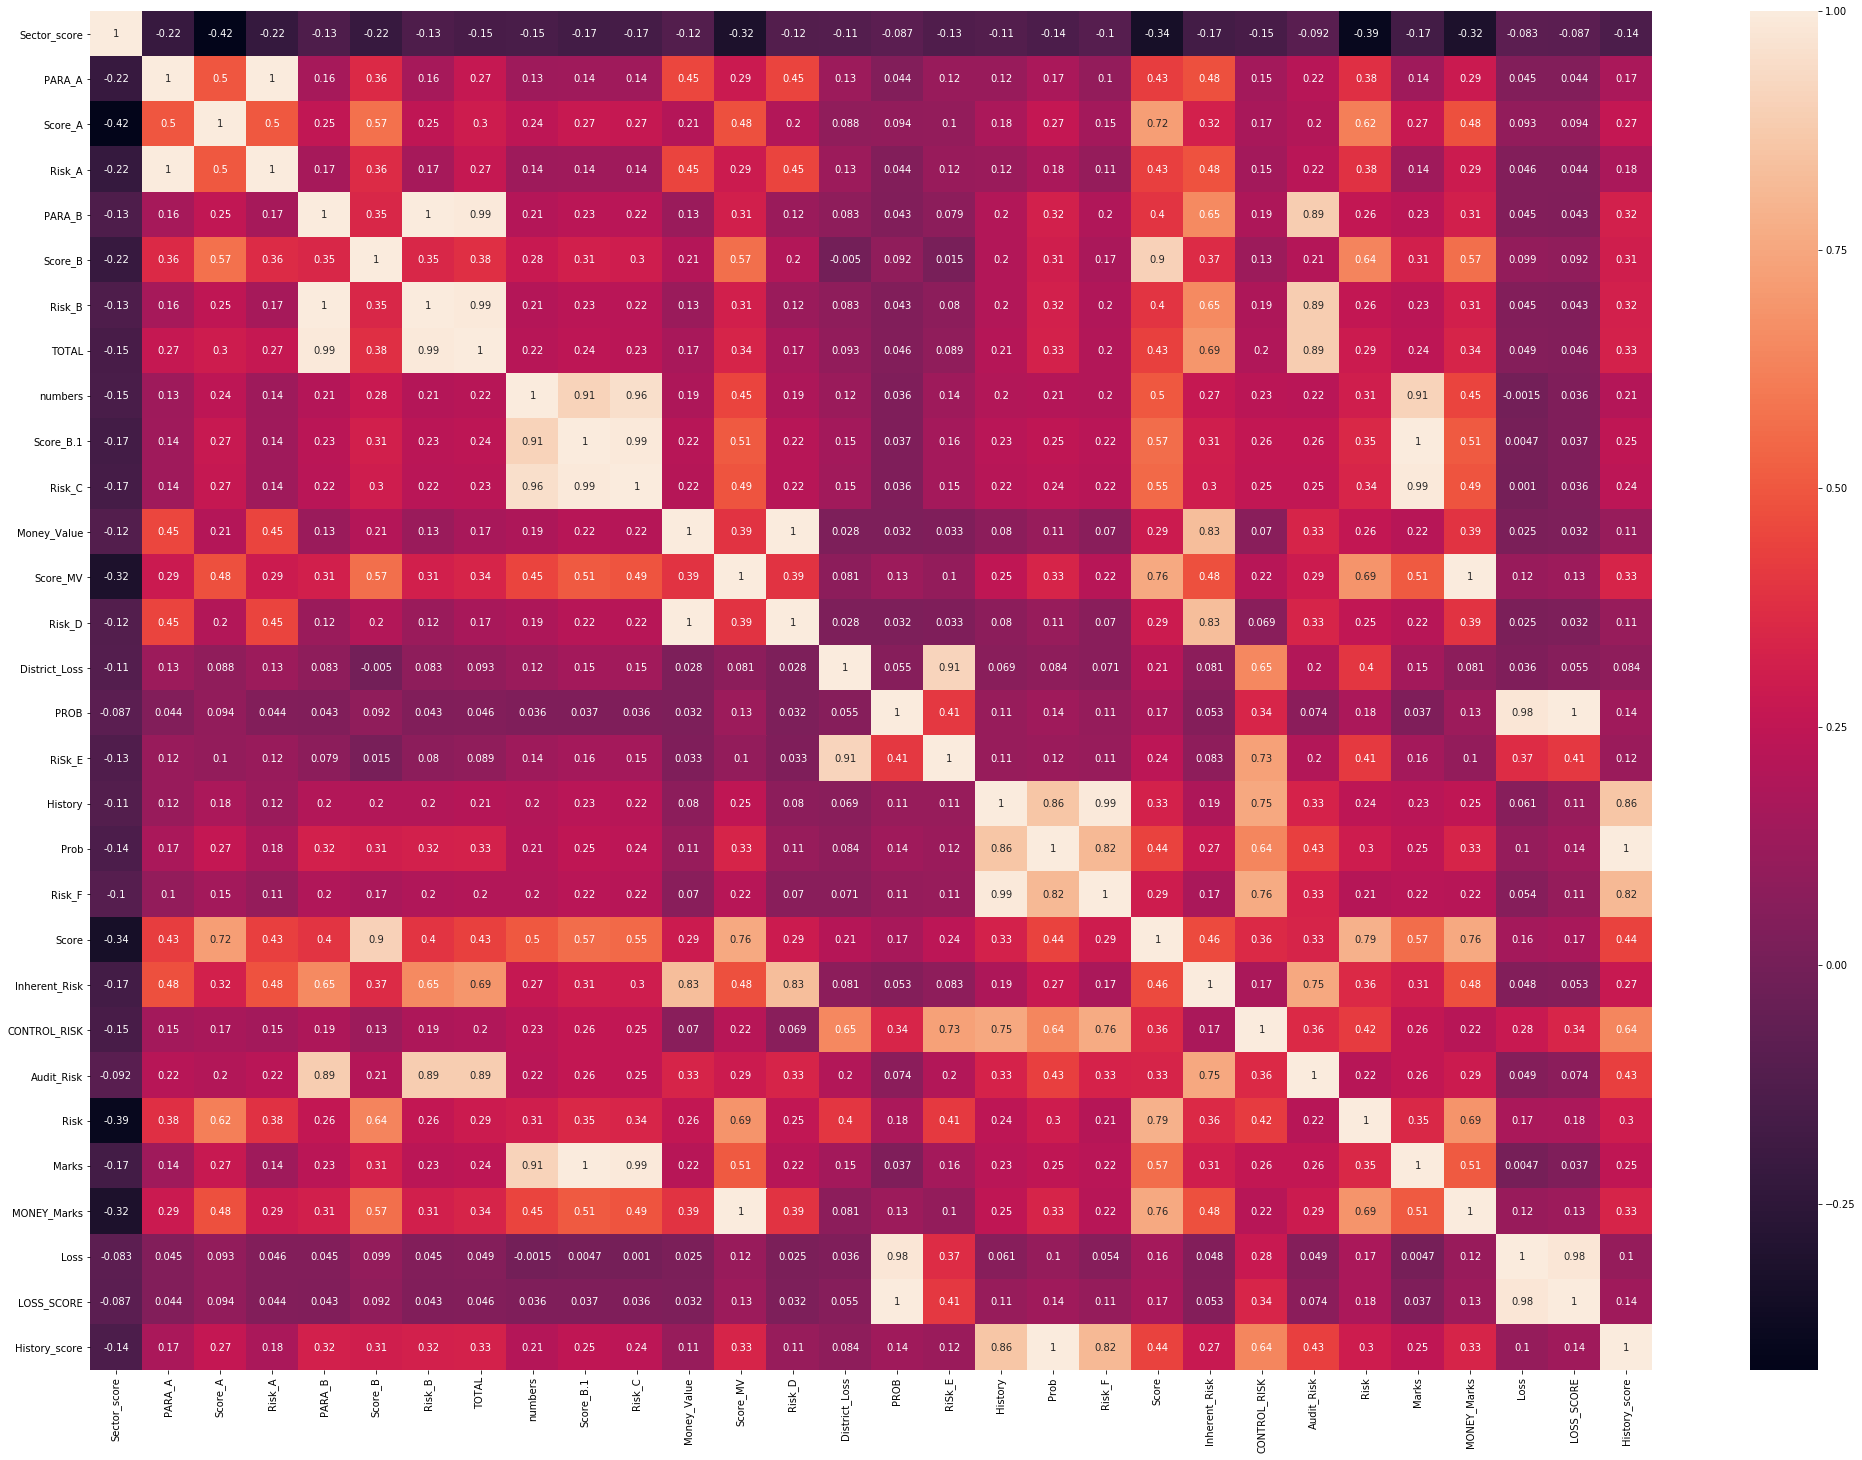

In [14]:
plt.figure(figsize=(35,25)) 
sns.heatmap(dataset.corr(), annot=True) 

- We have found some perfect correlations and on digging futher into the linear dependencies and correlations we have decided to take below actions 
- Few other dependencies we have discovered and we are keeping one out of the two columns
- We are keeping Marks, History_score, MONEY_Marks and Loss, and dropping Score_B.1,Prob, PROB, LOSS_SCORE and Score_MV as these columns are nothing but derived from the former columns only and will not help much in explaining the variation in the dependent variable

In [15]:
print(sum(dataset['Score_B.1']*10==dataset['Marks']))
print(sum(dataset['History_score']/10==dataset['Prob']))
print(sum(dataset['LOSS_SCORE']/10==dataset['PROB']))
print(sum(dataset['Score_MV']*10==dataset['MONEY_Marks']))
print(sum(dataset['Loss']==dataset['LOSS_SCORE']-2))

775
775
775
775
753


In [16]:
dataset.drop(columns=['Score_B.1','Prob', 'PROB', 'Score_MV','LOSS_SCORE'],inplace=True,axis=1)

- We found another interesting relationship among columns in the data, where Risk A added upto Risk E is the total Inherent Risk, so We are dropping Risk A, Risk B, Risk C, Risk D, Risk E and Risk F and keeping Inherent Risk. 
- Firstly we do not want any Linear Dependency and secondly it will increase the computational efficiency.

In [17]:
a=dataset['Risk_A']+dataset['Risk_B']+dataset['Risk_C']+dataset['Risk_D']+dataset['RiSk_E']+dataset['Risk_F']
df=pd.concat([a,dataset['Inherent_Risk']],axis=1)
df=df.round(3)
sum(df[0]==df['Inherent_Risk'])


# for 773 rows out of 775 Sum of Risk A to RIsk F equals Inherent RIsk

773

In [18]:
dataset.drop(columns=['Risk_A','Risk_B','Risk_C','Risk_D','RiSk_E','Risk_F'],axis=1, inplace=True)

In [19]:
dataset.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL',
       'numbers', 'Money_Value', 'District_Loss', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Risk', 'Marks',
       'MONEY_Marks', 'Loss', 'History_score'],
      dtype='object')

### Exploring the data 
By exploring we are trying to check for different type of data we have in our dataset. For exploring we are using decribe() function. 

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 775
Data columns (total 19 columns):
Sector_score     775 non-null float64
PARA_A           775 non-null float64
Score_A          775 non-null float64
PARA_B           775 non-null float64
Score_B          775 non-null float64
TOTAL            775 non-null float64
numbers          775 non-null float64
Money_Value      775 non-null float64
District_Loss    775 non-null int64
History          775 non-null int64
Score            775 non-null float64
Inherent_Risk    775 non-null float64
CONTROL_RISK     775 non-null float64
Audit_Risk       775 non-null float64
Risk             775 non-null int64
Marks            775 non-null int64
MONEY_Marks      775 non-null int64
Loss             775 non-null int64
History_score    775 non-null int64
dtypes: float64(12), int64(7)
memory usage: 121.1 KB


In [21]:
dataset.describe()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,Loss,History_score
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,20.138877,2.453059,0.351484,10.813924,0.313290,13.235241,5.067742,14.137631,2.505806,0.104516,2.703484,17.701560,0.572903,7.177034,0.393548,2.237419,2.910968,0.029677,2.167742
std,24.301417,5.681977,0.174082,50.114461,0.169865,51.343841,0.264608,66.606519,1.229338,0.531360,0.859106,54.772482,0.444825,38.691674,0.488852,0.803991,1.598148,0.184396,0.680281
min,1.850000,0.000000,0.200000,0.000000,0.200000,0.000000,5.000000,0.000000,2.000000,0.000000,2.000000,1.400000,0.400000,0.280000,0.000000,2.000000,2.000000,0.000000,2.000000
25%,2.370000,0.210000,0.200000,0.000000,0.200000,0.540000,5.000000,0.000000,2.000000,0.000000,2.000000,1.584000,0.400000,0.316800,0.000000,2.000000,2.000000,0.000000,2.000000
50%,3.890000,0.880000,0.200000,0.410000,0.200000,1.370000,5.000000,0.090000,2.000000,0.000000,2.400000,2.214000,0.400000,0.556000,0.000000,2.000000,2.000000,0.000000,2.000000
75%,55.570000,2.480000,0.600000,4.160000,0.400000,7.725000,5.000000,5.595000,2.000000,0.000000,3.300000,10.703000,0.400000,3.252600,1.000000,2.000000,4.000000,0.000000,2.000000
max,59.850000,85.000000,0.600000,1264.630000,0.600000,1268.910000,9.000000,935.030000,6.000000,9.000000,5.200000,801.262000,5.800000,961.514400,1.000000,6.000000,6.000000,2.000000,6.000000


In [22]:
dataset.shape

(775, 19)

## Step - 2 : Visualizing the Data 

We are plotting histograms for different variables to understand the distribution of data. This will help us in understanding the operations to be performed. For checking the collinearity we are ploting heat map which will help us in understanding which variables are collinear.

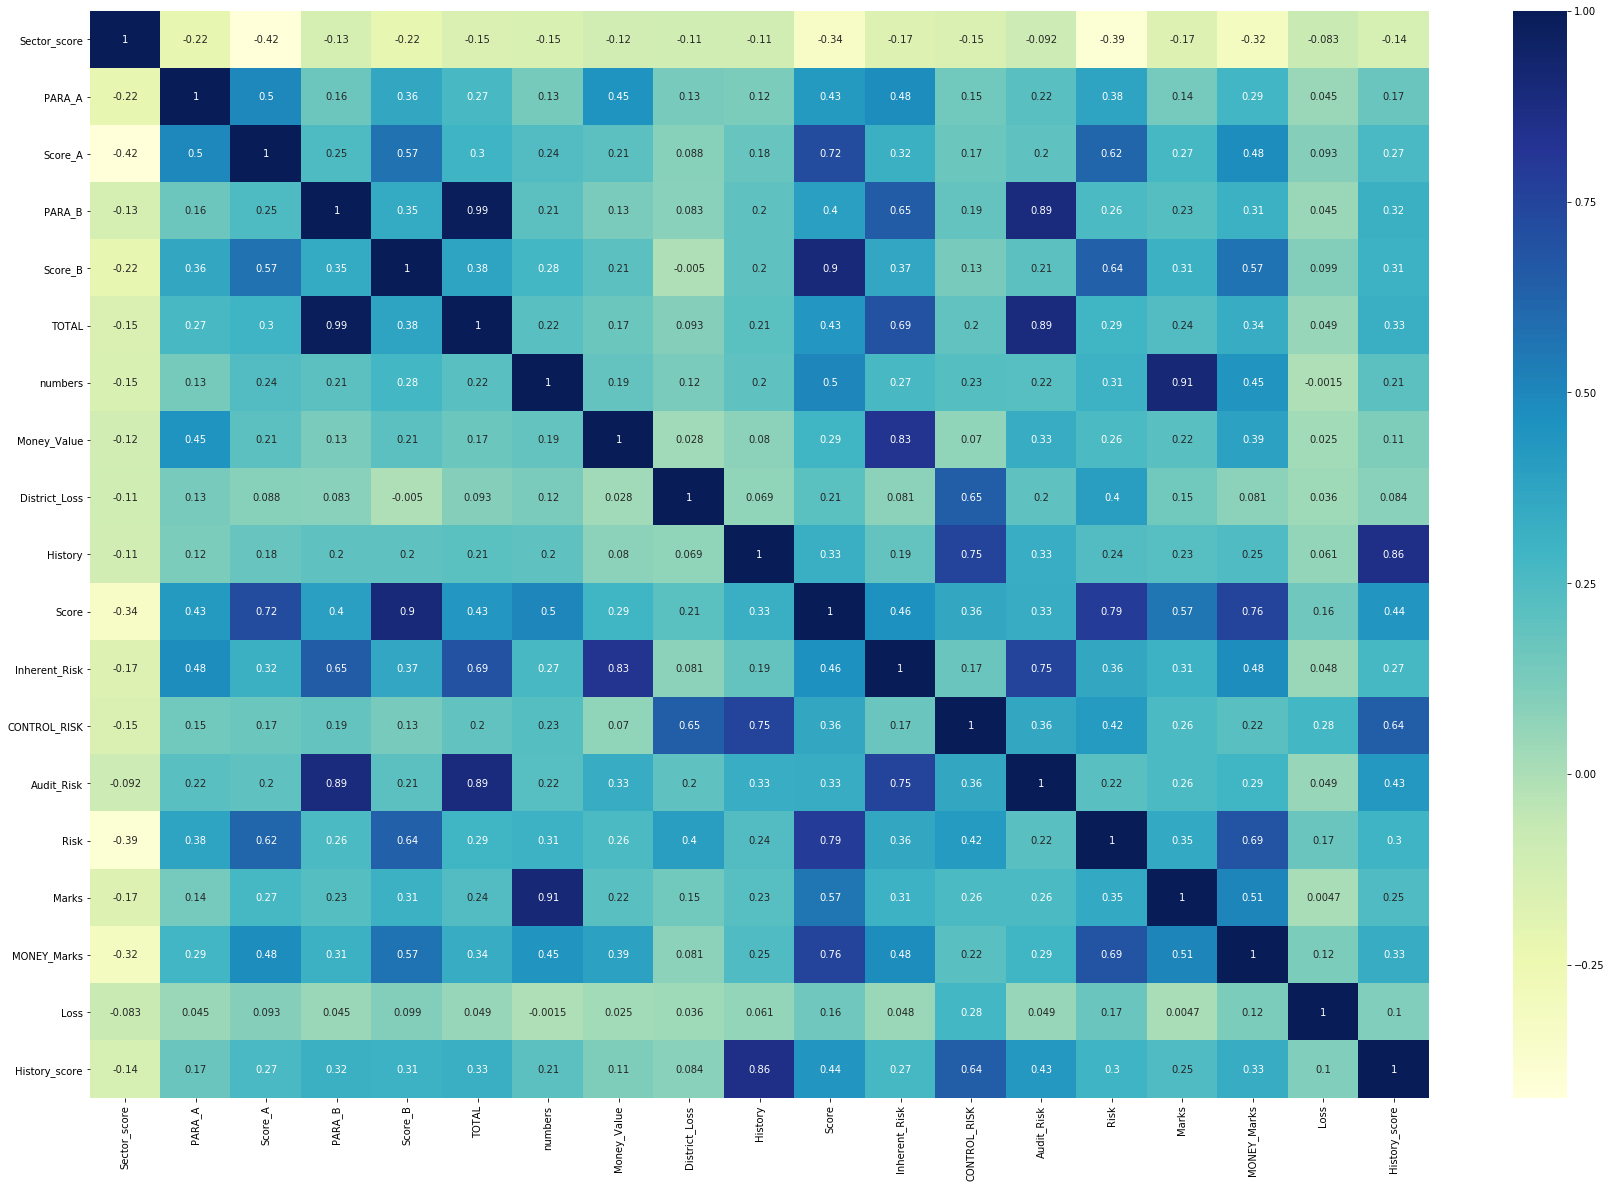

In [23]:
plt.figure(figsize=(30,20)) 
sns.heatmap(dataset.corr(), annot=True,  cmap="YlGnBu") 

    The heatmap details the correlation among all the variables. Based on the color we can understand how various variables are correlated with our depedent variable 

## Histogram distribution of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B12F8C5518>,
      dtype=object)

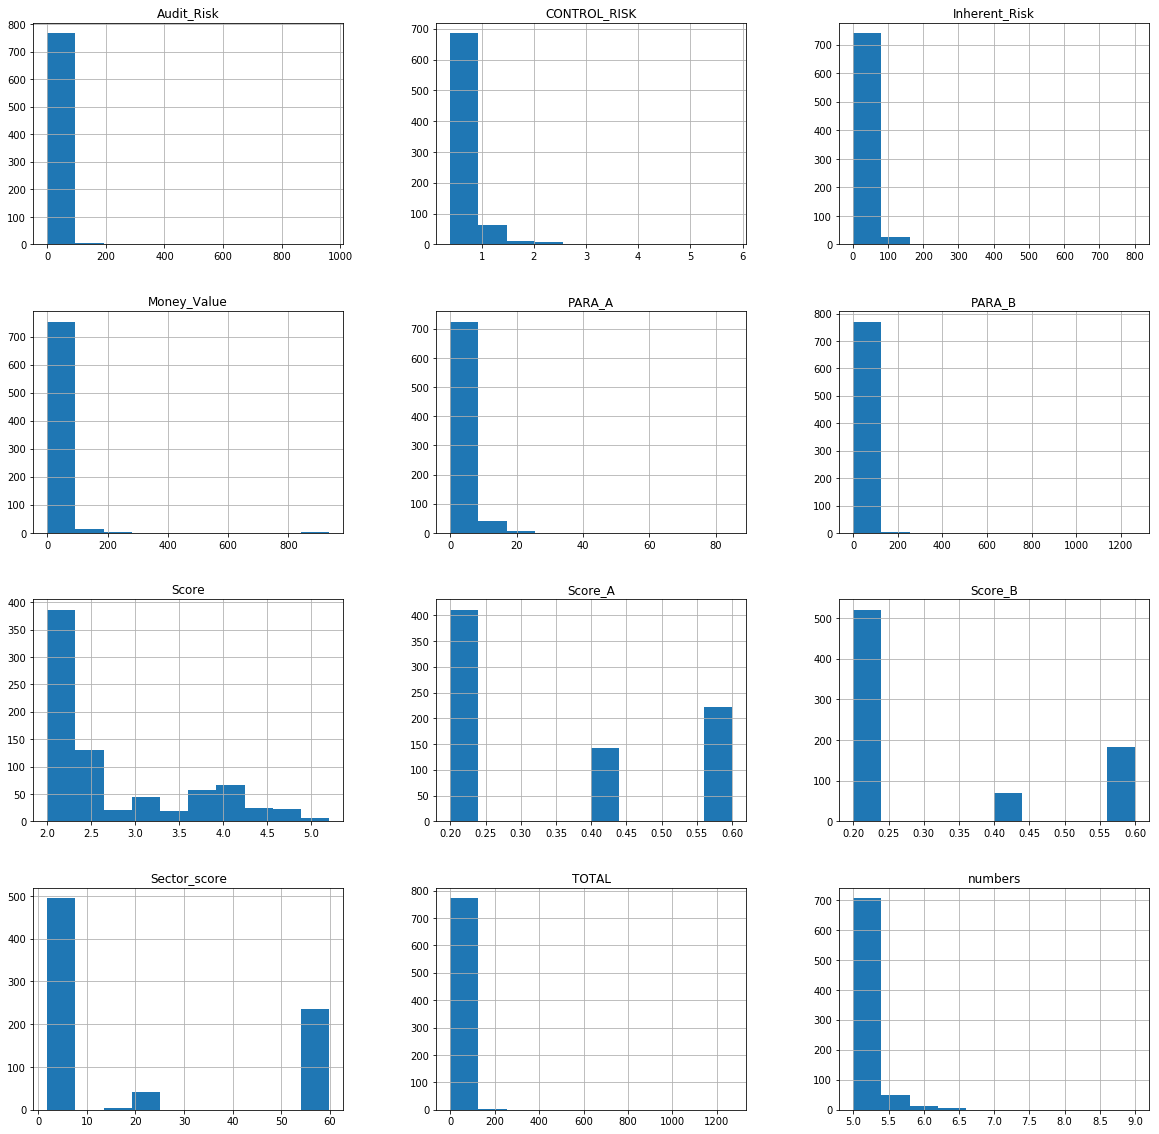

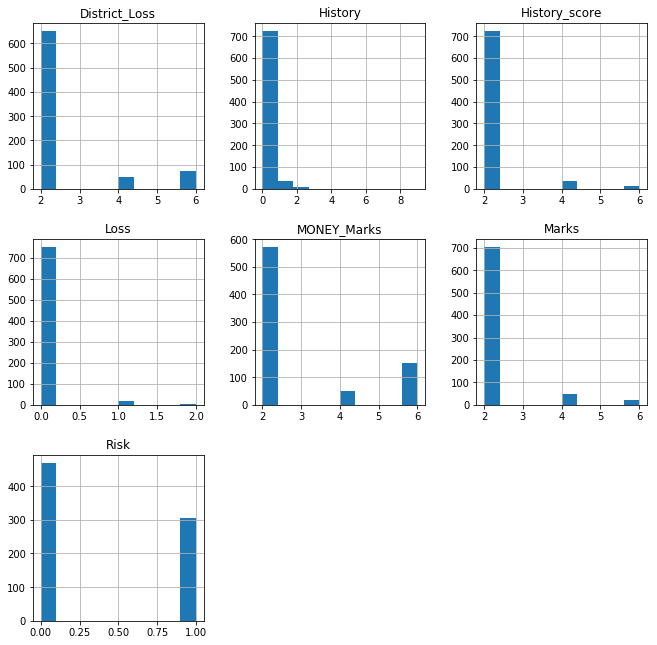

In [24]:
dataset[dataset.dtypes[(dataset.dtypes=="float")].index.values].hist(figsize=[20,20])
dataset[dataset.dtypes[(dataset.dtypes=="int64")].index.values].hist(figsize=[11,11])

    The plots indicate the distribution of the data. The distribution is helpful in understanding the structure of the data and deciding on the scaling that needs to be undertaken on the data. 
    The plotting of the variables indicate that the data is distributed in various scales. 
    There is a need to bring the variables on a similar scale, as not doing so will result in supperssion of weaker variables.
    
    We have also plotted few pairplots using seaborn, to understand how different variables are assoiated with each other and how they vary with the target variable for classification i.e. Risk


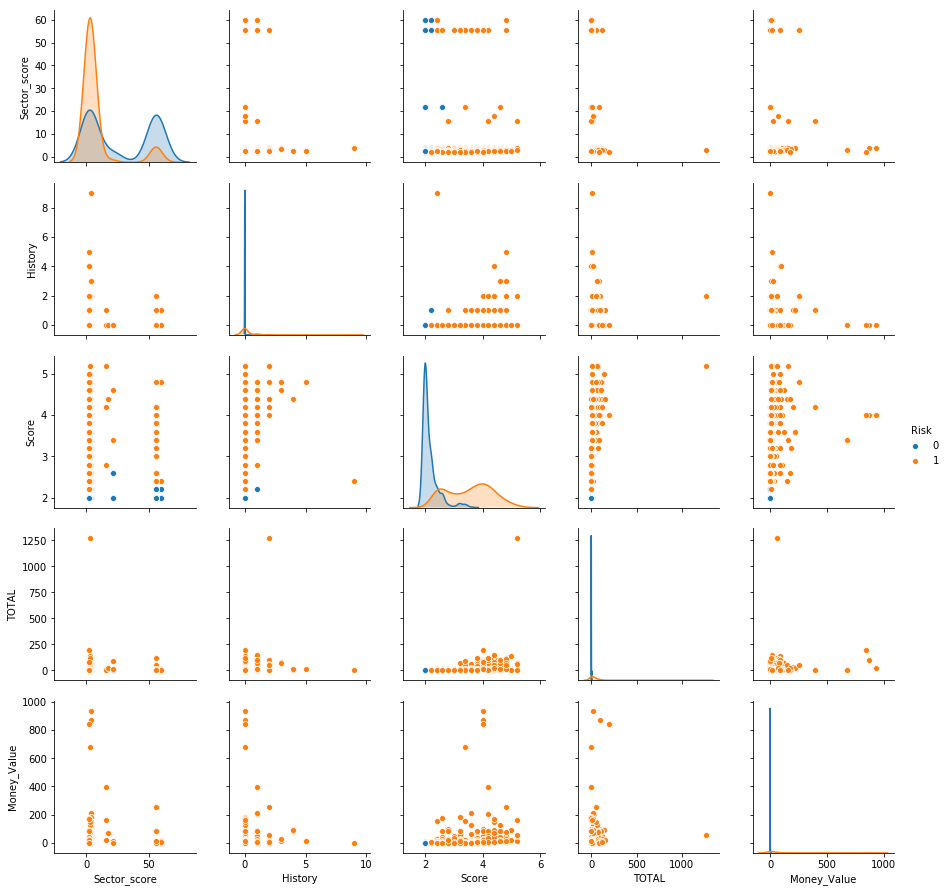

In [25]:
sns.pairplot(dataset, hue = 'Risk', vars = ['Sector_score','History','Score', 'TOTAL', 'Money_Value'])


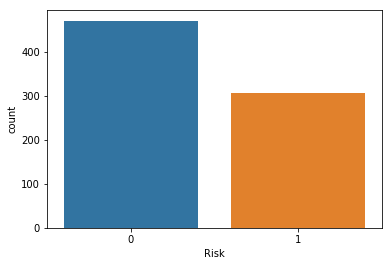

In [26]:
sns.countplot(dataset['Risk'], label = "Count") 

    We wanted to make sure that the data we are working with is not unbalanced, with the count of target variable, looks like we do not need to balance the dataset.

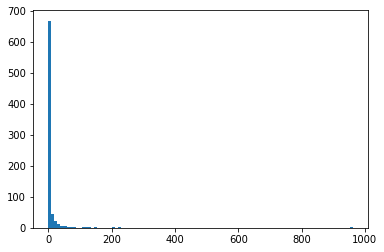

In [27]:
plt.hist(dataset['Audit_Risk'],bins=100)
plt.show()

    We can see a few outliers and we need to get rid of those, We have decided to drop values greater than 100 for Audit_Risk from our dataset to get rid of these outliers

In [28]:
dataset=dataset[dataset['Audit_Risk']<100]

## Step - 3 Model Training and Evaluation

## Regression
Firstly we will complete the Regression Tasks predicting <b>Audit_Risk</b>


#### Splitting into train and test

In [29]:
X=dataset.drop(columns=['Audit_Risk','Risk'],axis=1)
y=dataset['Audit_Risk']

In [30]:
X.head()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Marks,MONEY_Marks,Loss,History_score
0,3.89,4.18,0.6,2.50,0.2,6.68,5.0,3.38,2,0,2.4,8.574,0.4,2,2,0,2
1,3.89,0.00,0.2,4.83,0.2,4.83,5.0,0.94,2,0,2.0,2.554,0.4,2,2,0,2
2,3.89,0.51,0.2,0.23,0.2,0.74,5.0,0.00,2,0,2.0,1.548,0.4,2,2,0,2
3,3.89,0.00,0.2,10.80,0.6,10.80,6.0,11.75,2,0,4.4,17.530,0.4,6,6,0,2
4,3.89,0.00,0.2,0.08,0.2,0.08,5.0,0.00,2,0,2.0,1.416,0.4,2,2,0,2


In [31]:
y.head()

0    1.7148
1    0.5108
2    0.3096
3    3.5060
4    0.2832
Name: Audit_Risk, dtype: float64

In [32]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
X_train_unscaled.head()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Marks,MONEY_Marks,Loss,History_score
430,1.85,3.26,0.6,0.36,0.2,3.62,5.0,0.02,2,0,2.4,3.432,0.4,2,2,0,2
645,55.57,0.73,0.2,0.00,0.2,0.73,5.0,0.00,2,0,2.0,1.546,0.4,2,2,0,2
406,1.85,2.48,0.6,0.00,0.2,2.48,5.0,0.00,2,0,2.4,2.888,0.4,2,2,0,2
651,55.57,0.00,0.2,0.00,0.2,0.00,5.0,0.00,2,0,2.0,1.400,0.4,2,2,0,2
395,1.85,3.17,0.6,0.44,0.2,3.61,5.0,0.00,4,0,2.6,3.790,0.8,2,2,0,2


In [34]:
X_train_unscaled.shape

(613, 17)

In [35]:
y_train.shape

(613,)

### Scaling the Data
Scaling the data using StandardScaler

(-1, 2.5)

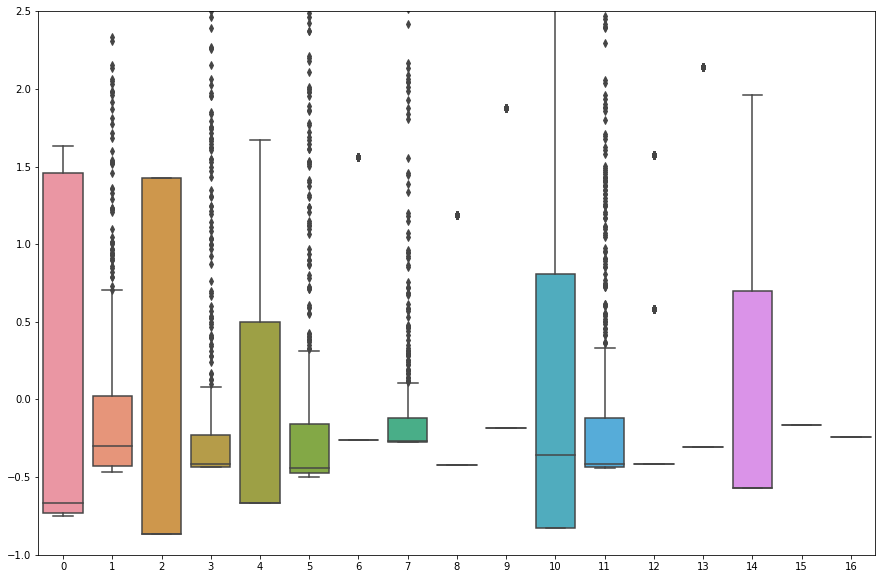

In [41]:
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)

x2=pd.DataFrame(X_train)
plt.figure(figsize=(15,10))
sns.boxplot(data = x2)
plt.ylim(-1,2.5)

## i) KNN Regressor


Mean squared error varying with k [39.592112222081866, 37.67698950574766, 31.993432503558843, 24.728961046795643, 27.455445828702086, 30.528993756959146, 30.956461253364363, 30.83237009840395, 32.49100449069497, 33.53988339762168, 34.15051626393602, 34.51719177571938, 35.358834684375, 34.22731853822946]


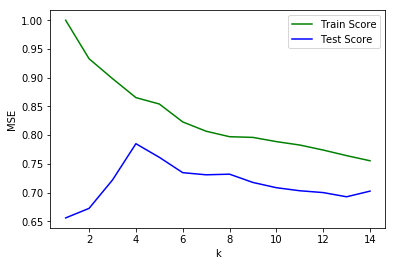

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_score_array = []
test_score_array = []
mean_squared=[]

for k in range(1,15):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
    mean_squared.append(mean_squared_error(y_test,knn.predict(X_test)))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print('Mean squared error varying with k {}'.format(mean_squared))


- k=4 looks good here, achieving nearly 80% test accuracy

#### Finding the Best Parameter for KNN Regressor using Grid Search

In [43]:
# Applying Grid Search to find the best parameters
knn=KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV

## We are creating a grid for which all n_neighbors values are to be used for cross validation
parameters = {'n_neighbors': range(1,10)}

## Using Grid search for exhaustive searching
grid_search = GridSearchCV(knn,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Cross ValidationAccuracy is {}'.format(best_accuracy))
print('Best Parameters {}'.format(best_parameters))
print('Test Score {}'.format(grid_search.score(X_test,y_test)))
print('Train Score {}'.format(grid_search.score(X_train,y_train)))

Best Cross ValidationAccuracy is 0.7529664356141326
Best Parameters {'n_neighbors': 4}
Test Score 0.7850665716111163
Train Score 0.8653093729227699


### Visualizing the results of grid search 

In [44]:
# convert to DataFrame the results of grid search
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000800,0.000400,0.001594,0.000491,1,{'n_neighbors': 1},0.633500,0.962378,0.756944,0.789084,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000798,0.000399,0.001396,0.000489,2,{'n_neighbors': 2},0.646709,0.953004,0.720247,0.836294,...,0.927662,0.930828,0.925890,0.936041,0.926922,0.939315,0.944236,0.926351,0.931033,0.006488
2,0.000898,0.000299,0.001197,0.000399,3,{'n_neighbors': 3},0.636503,0.871680,0.716359,0.867369,...,0.899777,0.881452,0.873818,0.894843,0.898208,0.909840,0.901525,0.879526,0.891844,0.011177
3,0.000798,0.000399,0.001296,0.000457,4,{'n_neighbors': 4},0.621890,0.832723,0.684308,0.878727,...,0.866760,0.869763,0.845729,0.858324,0.872792,0.872221,0.860999,0.853075,0.862092,0.008780
4,0.000998,0.000003,0.001194,0.000392,5,{'n_neighbors': 5},0.638955,0.789130,0.640883,0.813842,...,0.856507,0.839820,0.819907,0.850694,0.848186,0.851075,0.834470,0.827741,0.840646,0.013630


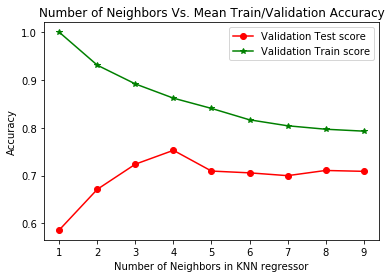

In [45]:
plt.plot(parameters['n_neighbors'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(parameters['n_neighbors'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors in KNN regressor')
plt.ylabel('Accuracy')
plt.legend()

## Applying Different Cross Validations using best parameters

### Using Cross-Validation

In [47]:
from sklearn.model_selection import cross_val_score

knn=KNeighborsRegressor(4)

accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)

print('Average Validation Accuracy is {}'.format(accuracies.mean()))
print('Mean Standard Deviation in accuracies is {}\n'.format(accuracies.std()))

Average Validation Accuracy is 0.7531631213554542
Mean Standard Deviation in accuracies is 0.09609591008524827



### Using stratified K-fold Cross Validation

In [48]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

knn=KNeighborsRegressor(4)

score=cross_val_score(knn,X = X_train, y = y_train, cv=kfold)

print('Average Cross-validation score:{}\n'.format(score.mean()))

Average Cross-validation score:0.7541941631405615



#### Rebuilding the model on the best parameters found using Gridsearch

In [50]:
knn = KNeighborsRegressor(**best_parameters)
knn.fit(X_train, y_train)
print('Train score on best parameters {}'.format(knn.score(X_train,y_train)))
print('Test score on best parameters {}'.format(knn.score(X_test,y_test)))
grid_search.score(X_test,y_test)

print('Mean Squared Error : {}'.format(mean_squared_error(y_test,knn.predict(X_test))))

Train score on best parameters 0.8653093729227699
Test score on best parameters 0.7850665716111163
Mean Squared Error : 24.728961046795643


#### Plotting Score (a X variable) with Risk (Target Variable) to visualize how our KNN regressor fits the data

Text(0.5, 1.0, 'Score Vs. Audit Risk')

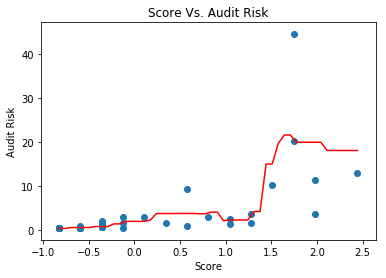

In [51]:
#Score and Audit_Risk
X_b = X_train[:50,10].reshape(-1,1)
y_b = y_train[:50]

knn = KNeighborsRegressor(4)
knn.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')

## ii) Linear Regression


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()

regressor.fit(X_train, y_train)
print('Train Score {}'.format(regressor.score(X_train, y_train)))
print('Test Score {}\n'.format(regressor.score(X_test, y_test)))

print('linear model coeff (w): {}\n'.format(regressor.coef_))
print('linear model intercept (b): {:.3f}\n'.format(regressor.intercept_))
print('R-squared score (training): {:.3f}\n'.format(regressor.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(X_test, y_test)))

Train Score 0.8918842738686888
Test Score 0.8278427134414473

linear model coeff (w): [ 4.57026746e-01  2.10136423e+01 -3.24406302e-01  8.70689029e+01
 -6.99386026e-01 -9.60360562e+01 -1.23190688e+00 -3.19689971e+00
 -8.97286130e-01 -2.67299936e+00 -3.42972333e-02  1.06573463e+01
  3.74525535e+00  1.42056424e+00  9.69424293e-02  3.69057340e-02
  4.02948434e+00]

linear model intercept (b): 4.750

R-squared score (training): 0.892

R-squared score (test): 0.828


#### Plotting Score (a X variable) with Risk (Target Variable)

Text(0.5, 1.0, 'Score Vs. Audit Risk')

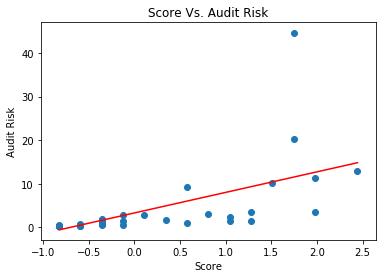

In [53]:
#Score and Audit_Risk
X_b = X_train[:50,10].reshape(-1,1)
y_b = y_train[:50]

regressor = LinearRegression()

regressor.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = regressor.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')

### Using stratified K-fold Cross Validation

In [57]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=2)
regressor=LinearRegression()

score=cross_val_score(regressor,X = X_train, y = y_train, cv=kfold)

print('Average Cross-validation score:{}\n'.format(score.mean()))

Average Cross-validation score:0.2523473567506405



### Finding Best Parameters using GridSearchCV and obtaining Test and Train Score

In [58]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(X_test) - y_test) ** 2))
print('Best Parameters {}'.format(grid.best_params_))
print('Train Score {}'.format(grid.score(X_train,y_train)))
print('Test Score {}'.format(grid.score(X_test,y_test)))

Residual sum of squares: 19.81
Best Parameters {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Train Score 0.8918842738686888
Test Score 0.8278427134414473


## iii) Ridge


        Fitting models with different values of alpha (a hyperparameter for ridge), and visualizing the train and test scores for different values of alpha

Text(0.5, 0, '$\\alpha$')

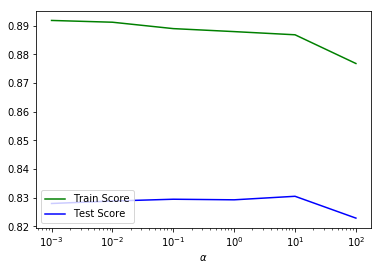

In [59]:
from  sklearn.linear_model import Ridge
# Ridge uses L2 Penalty

# Defining values for hyperparameter alpha
alpha = [0.001,0.01, 0.1, 1, 10, 100]

train_score_list = []
test_score_list = []

# Fitting models for different values of alpha
for i in alpha: 
    ridge = Ridge(i)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

plt.plot(alpha, train_score_list, c = 'g', label = 'Train Score')
plt.plot(alpha, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

- With Increase in alpha, Regularization increases and we can see in the graph, with increase in alpha model becomes more and more restricted, and leads to underfitting. 
- This graph suggests alpha=10 as optimal value. Let's find out the optimal values using Grid search
- But before that let's find out how the importance of each feature, and see how it converges with each value on increasing alpha

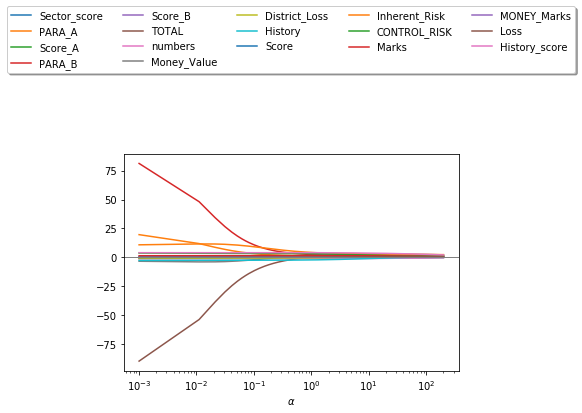

In [61]:
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 200, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)

coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)
col=X.columns.values
for i in range(0,17):
    plt.plot(x_range, coeff[:,i], label = '{}'.format(col[i]))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.7),
          ncol=5, fancybox=True, shadow=True)
plt.show()

#### Finding the Best Parameter using Grid Search

In [62]:
# Applying Grid Search to find the best parameters
ridge=Ridge()

from sklearn.model_selection import GridSearchCV

## We are creating a grid for which all n_neighbors values are to be used for cross validation
parameters = {'alpha':[0.001,0.01, 0.1, 1, 3, 5,10, 12,15,20, 100]}

## Using Grid search for exhaustive searching
grid_search = GridSearchCV(ridge,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy is {}'.format(best_accuracy))
print('Best Parameters {}'.format(best_parameters))

Best Accuracy is 0.7102315619730801
Best Parameters {'alpha': 100}


### Visualizing the results of grid search 


In [63]:
# convert to DataFrame the results of grid search
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001795,1.465100e-03,0.000299,0.000457,0.001,{'alpha': 0.001},0.798810,0.826247,0.832477,0.829262,...,0.887739,0.893715,0.891190,0.898327,0.895356,0.911523,0.887194,0.894868,0.895281,0.006465
1,0.001296,4.567989e-04,0.000199,0.000399,0.01,{'alpha': 0.01},0.796621,0.826099,0.827467,0.832607,...,0.887156,0.892909,0.890443,0.897709,0.894659,0.910791,0.887193,0.894182,0.894652,0.006371
2,0.000998,4.461203e-04,0.000299,0.000457,0.1,{'alpha': 0.1},0.796201,0.826485,0.820083,0.838791,...,0.885143,0.890034,0.887773,0.895506,0.892139,0.908237,0.887146,0.891715,0.892405,0.006096
3,0.000997,5.545475e-07,0.000499,0.000499,1,{'alpha': 1},0.798295,0.836160,0.819262,0.854267,...,0.884381,0.888569,0.886584,0.894461,0.890842,0.906881,0.886975,0.890479,0.891305,0.005940
4,0.001000,6.862190e-06,0.000299,0.000457,3,{'alpha': 3},0.798178,0.846844,0.823776,0.871190,...,0.884186,0.887614,0.886295,0.894150,0.890242,0.905391,0.886756,0.890012,0.890786,0.005648


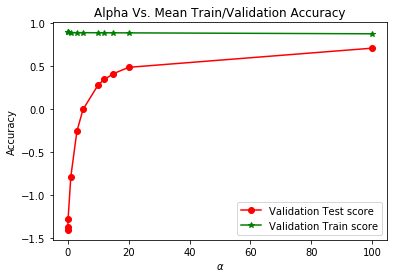

In [64]:
plt.plot(parameters['alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(parameters['alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend()

## Applying Different Cross Validations using best parameters


### Using Cross-Validation

In [66]:
from sklearn.model_selection import cross_val_score

ridge=Ridge(alpha=100)

accuracies = cross_val_score(estimator = ridge, X = X_train, y = y_train, cv = 10)

print('Average Validation Accuracy is {}'.format(accuracies.mean()))
print('Mean Standard Deviation in accuracies is {}\n'.format(accuracies.std()))

Average Validation Accuracy is 0.7095663061360921
Mean Standard Deviation in accuracies is 0.4258762047251118



### Using stratified K-fold Cross Validation



In [68]:
ridge=Ridge(alpha=100)
kfold = KFold(n_splits=3)
score=cross_val_score(ridge,X = X_train, y = y_train, cv=kfold)

print('Average Cross-validation score:{}\n'.format(score.mean()))

Average Cross-validation score:0.8188646841359374



### Rebuilding the model on the best parameters found using Gridsearch

In [70]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
print('Train score on best parameters {}'.format(ridge.score(X_train,y_train)))
print('Test score on best parameters {}'.format(ridge.score(X_test,y_test)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,ridge.predict(X_test))))



Train score on best parameters 0.8768489609752713
Test score on best parameters 0.8229187982637833
Mean Squared Error : 20.37390913400209


#### Plotting Score (a X variable) with Risk (Target Variable) to visualize how Ridge fits the data

Text(0.5, 1.0, 'Score Vs. Audit Risk')

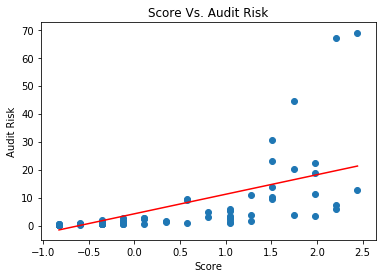

In [71]:
#Score and Audit_Risk
X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

ridge = Ridge(alpha=1)
ridge.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = ridge.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')

## iv) Lasso


    <b> Fitting models with different values of alpha, and visualizing the train and test scores for different values of alpha </b>

Text(0.5, 0, '$\\alpha$')

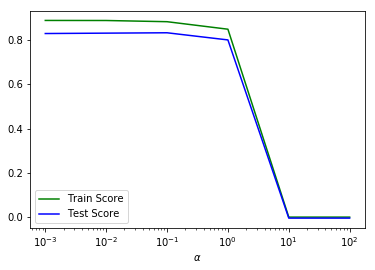

In [72]:
from  sklearn.linear_model import Lasso
# Lasso uses L1 Penalty

# Defining values for hyperparameter alpha
alpha = [0.001,0.01, 0.1, 1, 10, 100]

train_score_list = []
test_score_list = []

# Fitting models for different values of alpha
for i in alpha: 
    lasso = Lasso(i)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

plt.plot(alpha, train_score_list, c = 'g', label = 'Train Score')
plt.plot(alpha, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

### Finding Best Parameter using Grid Search

In [73]:
# Applying Grid Search to find the best parameters
lasso=Lasso()

from sklearn.model_selection import GridSearchCV

## We are creating a grid for which all n_neighbors values are to be used for cross validation
parameters = {'alpha':[0.001,0.01, 0.1, 1, 3, 5,10, 12,15,20, 100], 'max_iter':[1000,5000,10000,20000]}

## Using Grid search for exhaustive searching
grid_search = GridSearchCV(lasso,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy is {}'.format(best_accuracy))
print('Best Parameters {}'.format(best_parameters))

Best Accuracy is 0.795940896111952
Best Parameters {'alpha': 1, 'max_iter': 1000}


### Visualizing the results of grid search 

In [74]:
# convert to DataFrame the results of grid search
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.020061,0.000693,0.000492,0.000493,0.001,1000,"{'alpha': 0.001, 'max_iter': 1000}",0.798462,0.828377,0.817198,...,0.884520,0.888924,0.886779,0.894618,0.891108,0.907442,0.887011,0.890687,0.891534,0.006044
1,0.100743,0.011180,0.000096,0.000287,0.001,5000,"{'alpha': 0.001, 'max_iter': 5000}",0.794790,0.828005,0.820864,...,0.885055,0.890014,0.887787,0.895426,0.892125,0.908217,0.887143,0.891640,0.892372,0.006096
2,0.202573,0.003826,0.000303,0.000463,0.001,10000,"{'alpha': 0.001, 'max_iter': 10000}",0.794595,0.828188,0.822210,...,0.885508,0.890874,0.888540,0.895991,0.892839,0.908882,0.887149,0.892318,0.892996,0.006161
3,0.465474,0.084666,0.000504,0.000504,0.001,20000,"{'alpha': 0.001, 'max_iter': 20000}",0.796028,0.828173,0.823954,...,0.886063,0.891773,0.889361,0.896642,0.893591,0.909686,0.887149,0.893064,0.893672,0.006256
4,0.017662,0.002454,0.000502,0.000502,0.01,1000,"{'alpha': 0.01, 'max_iter': 1000}",0.797218,0.846786,0.822644,...,0.884340,0.888405,0.886631,0.894436,0.890787,0.907079,0.886885,0.890354,0.891265,0.006009


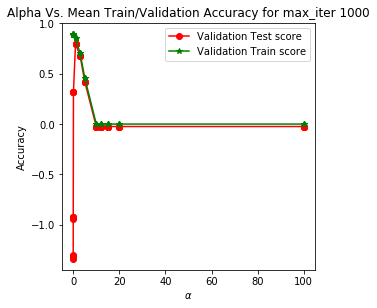

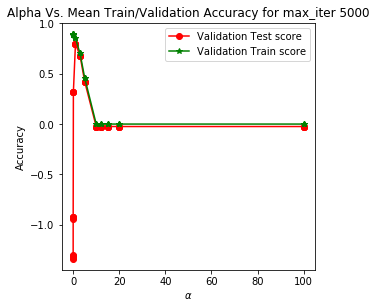

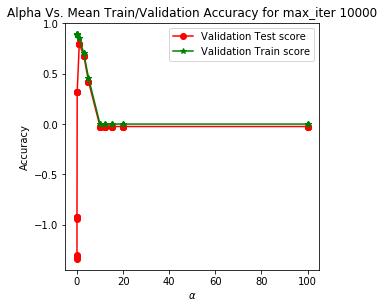

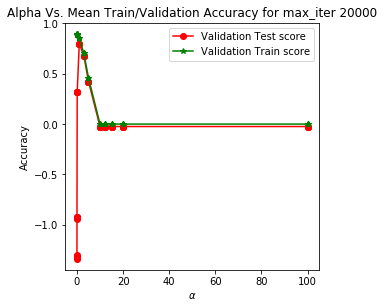

In [75]:
for i,j in zip(parameters['max_iter'],range(1,5)):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,j)
    plt.plot(results['param_alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
    plt.plot(results['param_alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
    plt.title('Alpha Vs. Mean Train/Validation Accuracy for max_iter {}'.format(i))
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Accuracy')
    plt.legend()


- <b>Best Validation Accuracy is 0.7959318276947114
- Best Parameters {'alpha': 1, 'max_iter': 1000} </b>

- <b>Let's visualize how each coefficient converges to zero with increasing value of alpha and then find out the training and test score with best parameter</b>

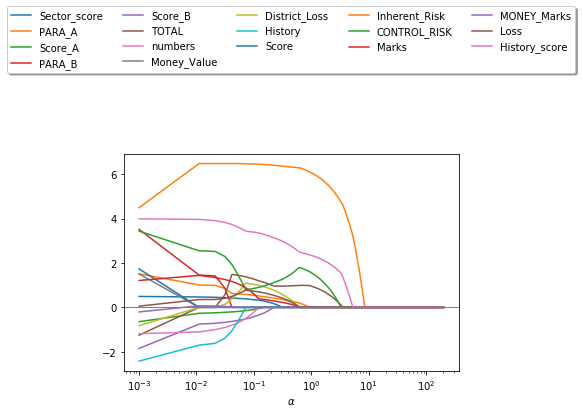

In [78]:
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 200, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)

coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha,max_iter=1000)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)
col=X.columns.values
for i in range(0,17):
    plt.plot(x_range, coeff[:,i], label = '{}'.format(col[i]))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.7),
          ncol=5, fancybox=True, shadow=True)
plt.show()

We can tell Control Risk, History Score and Inherent risk are most important features for prediction in our model

### Rebuilding the model on the best parameters found using Gridsearch


In [79]:
lasso = Lasso(alpha=1,max_iter=1000)
lasso.fit(X_train, y_train)
print('Train score on best parameters {}'.format(lasso.score(X_train,y_train)))
print('Test score on best parameters {}'.format(lasso.score(X_test,y_test)))
print('Non-zero features: {}'.format(np.sum(lasso.coef_ != 0)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,lasso.predict(X_test))))

Train score on best parameters 0.8485531879470005
Test score on best parameters 0.8001350675909012
Non-zero features: 4
Mean Squared Error : 22.99526958283362


#### Plotting Score (a X variable) with Risk (Target Variable) to visualize how Lasso fits the data

Text(0.5, 1.0, 'Score Vs. Audit Risk')

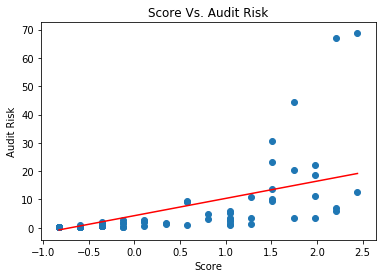

In [80]:
#Score and Audit_Risk
X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

lasso = Lasso(alpha=1,max_iter=1000)
lasso.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = lasso.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')

## v) SGD Regressor

  
- <b>Using Penalty l1</b>

In [81]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, penalty = 'l1')
sgd_reg.fit(X_train, y_train)
train=[]
test=[]
print('Train score for penalty l1 {}'.format(sgd_reg.score(X_train, y_train)))
print('Test score for penalty l1 {}'.format(sgd_reg.score(X_test, y_test)))
train.append(sgd_reg.score(X_train, y_train))
test.append(sgd_reg.score(X_test, y_test))

Train score for penalty l1 0.8894448156092408
Test score for penalty l1 0.8295022130053049


- <b>Penalty l2</b>

In [82]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print('Train score for penalty l2 {}'.format(sgd_reg.score(X_train, y_train)))
print('Test score for penalty l2 {}'.format(sgd_reg.score(X_test, y_test)))
train.append(sgd_reg.score(X_train, y_train))
test.append(sgd_reg.score(X_test, y_test))


Train score for penalty l2 0.8890693234092737
Test score for penalty l2 0.829344350818275


### Finding Best parameter using Grid Search

In [83]:
# Applying Grid Search to find the best parameters
sgd_reg = SGDRegressor(max_iter=10000)

from sklearn.model_selection import GridSearchCV

## We are creating a grid for which all n_neighbors values are to be used for cross validation
parameters = {'penalty':['l1','l2','elasticnet'],'learning_rate':['constant','optimal','invscaling']}

## Using Grid search for exhaustive searching
grid_search = GridSearchCV(sgd_reg,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy is {}'.format(best_accuracy))
print('Best Parameters {}'.format(best_parameters))

Best Accuracy is -1.0858304450796117
Best Parameters {'learning_rate': 'adaptive', 'penalty': 'l1'}


#### Best Validation Accuracy is  0.8082
#### Best Parameters {'learning_rate': 'invscaling', 'penalty': 'l2'}

## Let's Fit the model with best parameters

In [84]:
sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000,learning_rate='invscaling' ,penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print('Train score for penalty l2 {}'.format(sgd_reg.score(X_train, y_train)))
print('Test score for penalty l2 {}'.format(sgd_reg.score(X_test, y_test)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,sgd_reg.predict(X_test))))

Train score for penalty l2 0.8890693234092737
Test score for penalty l2 0.829344350818275
Mean Squared Error : 19.634623300173278


### Plotting Score (a X variable) with Risk (Target Variable) to visualize how SGD Regressor fits the data

Text(0.5, 1.0, 'Score Vs. Audit Risk')

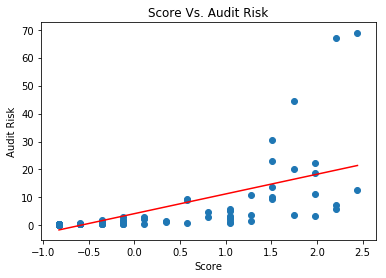

In [85]:
X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000,learning_rate='invscaling' ,penalty = 'l2')
sgd_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = sgd_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')

## vi) Polynomial Regression


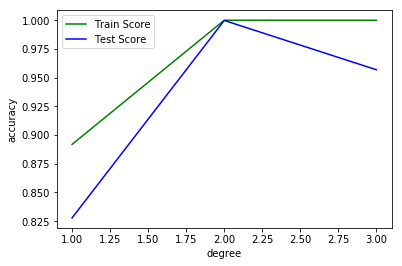

In [86]:
from  sklearn.preprocessing  import PolynomialFeatures

lreg=LinearRegression()

train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)  # n is the degree here, n=1 is same as linear regression
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

- Best performance is at degree 2 but going for higher degree is resulting in overfitting
- <b>Let's validate the resuls using cross validation</b>
        

In [87]:
lreg=LinearRegression()
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
score = cross_val_score(estimator = lreg, X = X_train_poly, y = y_train, cv = 10)

print('Average Validation Accuracy is {}'.format(score.mean()))
print('Mean Standard Deviation in accuracies is {}\n'.format(score.std()))

Average Validation Accuracy is 0.9087597386080806
Mean Standard Deviation in accuracies is 0.267433120113033



    Validation Accuracy looks good, but the training accuracy of 1 is a reason to worry

 
 #### Let's find out the results using cross validation
 

In [88]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
lreg=LinearRegression()
score = cross_val_score(estimator = lreg, X = X_train_poly, y = y_train, cv = 10)

print('Average Validation Accuracy is {}'.format(score.mean()))
print('Mean Standard Deviation in accuracies is {}\n'.format(score.std()))

Average Validation Accuracy is 0.9087597386080806
Mean Standard Deviation in accuracies is 0.267433120113033



    
    
   #### Using Stratified Cross Validation

In [89]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

X_train_poly = poly.fit_transform(X_train)
score = cross_val_score(estimator = lreg, X = X_train_poly, y = y_train, cv = kfold)

print('Average Cross-validation score:{}\n'.format(score.mean()))

Average Cross-validation score:0.9899210910439576



#### Final Model with best score

In [90]:
lreg=LinearRegression()
poly = PolynomialFeatures(2) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
print('Train Score: {}'.format(lreg.score(X_train_poly,y_train)))
print('Test Score: {}'.format(lreg.score(X_test_poly, y_test)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,lreg.predict(X_test_poly))))

Train Score: 1.0
Test Score: 0.9998132643206037
Mean Squared Error : 0.021484695872825418


#### Polynomial Regression is leading to overfitting of the data

#### Visualizing how Polynomial Regressor fits the data

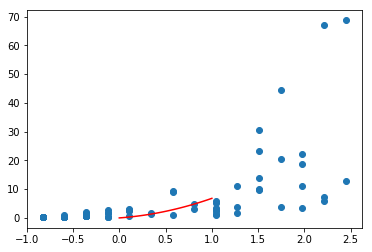

In [95]:
X_train_1 = X_train[:100,10].reshape(-1,1)
y_train1=y_train[:100]
plt.scatter(X_train_1,y_train1)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train1)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

plt.plot(x_axis, y_predict, c = 'r')


## vii) Linear SVM



In [96]:
from sklearn.svm import LinearSVR
linear_svr = LinearSVR()

linear_svr.fit(X_train, y_train) #by default c=1
print("Coefficient shape: ", linear_svr.coef_.shape)
print("Intercept shape: ", linear_svr.intercept_.shape)

print('Train Score : {}'.format(linear_svr.score(X_train,y_train)))
print('Test Score : {}'.format(linear_svr.score(X_test,y_test)))


Coefficient shape:  (17,)
Intercept shape:  (1,)
Train Score : 0.8127820124161975
Test Score : 0.7549002060358485


### Using Grid Search to find best parameters for Linear SVR

In [97]:
# Applying Grid Search to find the best parameters
linear_svr = LinearSVR(max_iter=10000)

from sklearn.model_selection import GridSearchCV

## We are creating a grid for which all n_neighbors values are to be used for cross validation
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

## Using Grid search for exhaustive searching
grid_search = GridSearchCV(linear_svr,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy is {}'.format(best_accuracy))
print('Best Parameters {}'.format(best_parameters))

Best Accuracy is 0.71931813399143
Best Parameters {'C': 0.1}


### let's visualize the results of Grid Search, how the test and train score varies with C

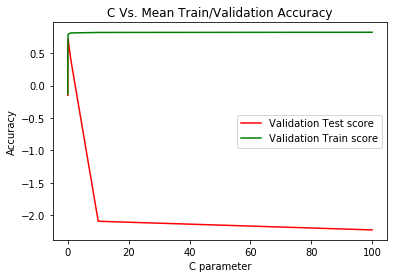

In [98]:
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(parameters['C'],results['mean_test_score'],c='r',label='Validation Test score')
plt.plot(parameters['C'],results['mean_train_score'],c='g',label='Validation Train score')
plt.title('C Vs. Mean Train/Validation Accuracy')
plt.xlabel('C parameter')
plt.ylabel('Accuracy')
plt.legend()

Text(0, 0.5, 'mean_test_score')

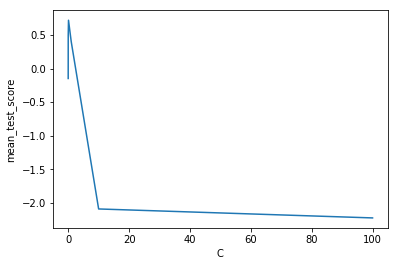

In [99]:
plt.plot(results.param_C,results.mean_test_score)
plt.xlabel('C')
plt.ylabel('mean_test_score')


#### Fitting Model with best parameters

In [100]:
linear_svr = LinearSVR(C=0.1)

linear_svr.fit(X_train, y_train) 

print('Train Score : {}'.format(linear_svr.score(X_train,y_train)))
print('Test Score : {}'.format(linear_svr.score(X_test,y_test)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,linear_svr.predict(X_test))))

Train Score : 0.7920350035252589
Test Score : 0.7413316354277129
Mean Squared Error : 29.76084250595452


### Applying cross validation on best parameters

In [101]:
linear_svr = LinearSVR(C=0.1)
score = cross_val_score(estimator = linear_svr, X = X_train, y = y_train, cv = 10)

print('Average Validation Accuracy is {}'.format(score.mean()))
print('Mean Standard Deviation in accuracies is {}\n'.format(score.std()))

Average Validation Accuracy is 0.7193736020998579
Mean Standard Deviation in accuracies is 0.1560105615179569



#### Using Stratified K-fold CV

In [103]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

linear_svr = LinearSVR(C=0.1)
score = cross_val_score(estimator = linear_svr, X = X_train, y = y_train, cv = kfold)

print('Average Cross-validation score:{}\n'.format(score.mean()))

Average Cross-validation score:0.7688210924184523



#### Visualizing how data is fit by LinearSVR

Text(0.5, 1.0, 'Score Vs. Audit Risk')

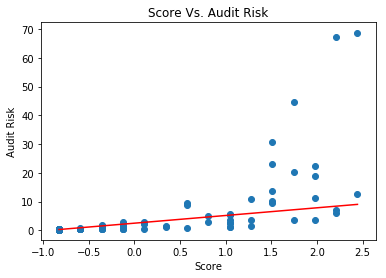

In [104]:
X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

linear_svr = LinearSVR(C=10)
linear_svr.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = linear_svr.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')

### viii) SVM with kernal trick

In [105]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(X_train, y_train) #fitting on default parameters

print('Train Score : {}'.format(svr.score(X_train,y_train)))
print('Test Score : {}'.format(svr.score(X_test,y_test)))

Train Score : 0.5255578916800111
Test Score : 0.44472778400529944


- Default value of parameters in giving us an underfit model
- Let's find out the best parameters using Grid Search and plot the results 

In [106]:
# Applying Grid Search to find the best parameters
svr = SVR()

from sklearn.model_selection import GridSearchCV

## We are creating a grid for which all n_neighbors values are to be used for cross validation
parameters = {'kernel':['rbf','poly','linear','sigmoid'],'gamma':[0.001, 0.01, 0.1, 1, 10, 100],
      'C':[0.001, 0.01, 0.1, 1, 10, 100]}

## Using Grid search for exhaustive searching
grid_search = GridSearchCV(svr,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy is {}'.format(best_accuracy))
print('Best Parameters {}'.format(best_parameters))

Best Accuracy is 0.9365123884548301
Best Parameters {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


<b>- So we have found the best parameters with C=100, gamma =0.01 and kernel=rbf </b>

<b>- Let's visualize the results to see how test score varies with C and gamma for kernel=rbf </b>

In [108]:
# Applying Grid Search to find the best parameters
svr = SVR(kernel='rbf')

from sklearn.model_selection import GridSearchCV

## We are creating a grid for which all n_neighbors values are to be used for cross validation
parameters = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100],
      'C':[0.001, 0.01, 0.1, 1, 10, 100]}

## Using Grid search for exhaustive searching
grid_search = GridSearchCV(svr,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


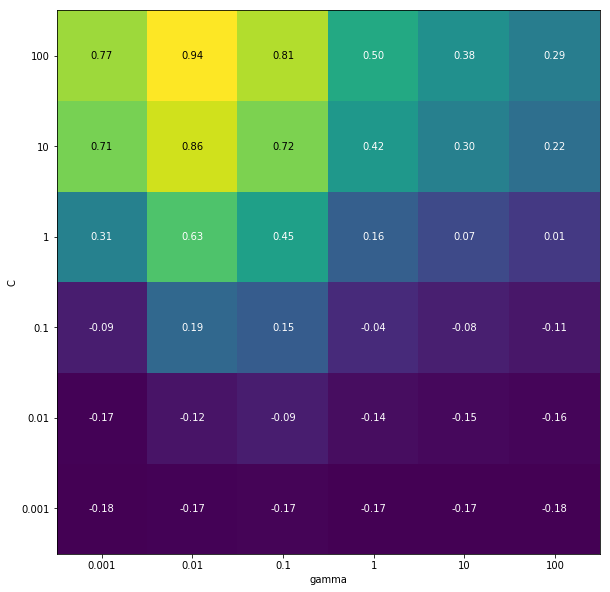

In [109]:
import mglearn
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=parameters['gamma'], ylabel='C', yticklabels=parameters['C'], cmap="viridis")

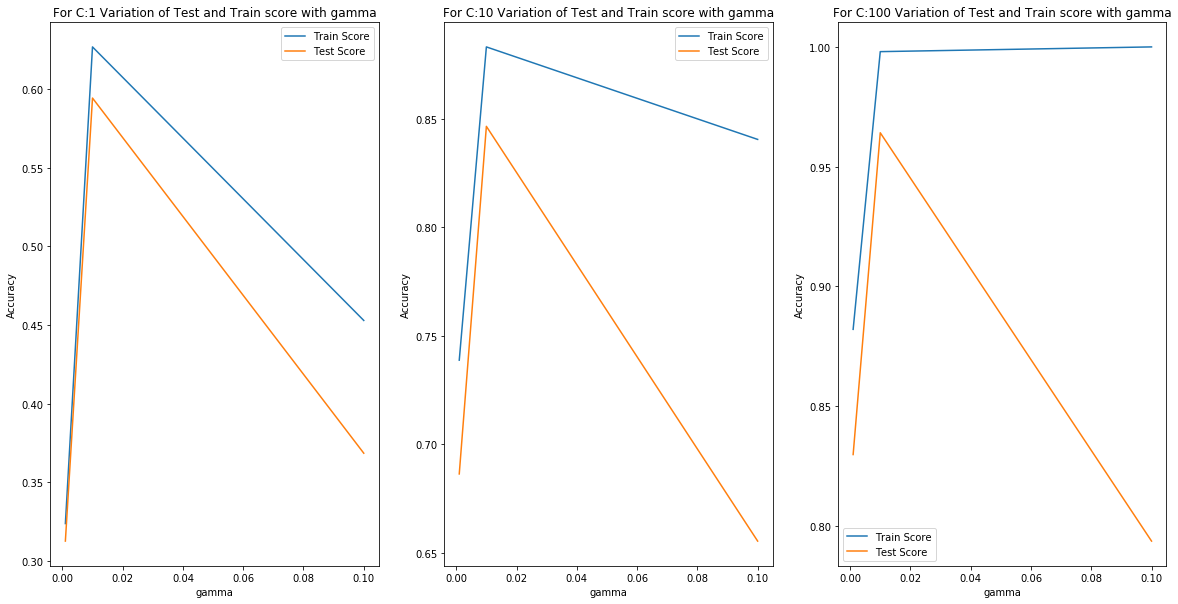

In [111]:
gamma=[0.001, 0.01, 0.1]
C=[1, 10, 100]

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

for i,k in zip(C,axes):
    train=[]
    test=[]
    for j in gamma:
        svr=SVR(kernel='rbf',C=i,gamma=j)
        svr.fit(X_train, y_train)
        train.append(svr.score(X_train, y_train))
        test.append(svr.score(X_test, y_test))
    k.plot(gamma,train)
    k.plot(gamma,test)
    k.set_xlabel('gamma')
    k.set_ylabel('Accuracy')
    k.legend(["Train Score", "Test Score"], loc="best")    
    k.set_title("For C:{} Variation of Test and Train score with gamma".format(i))
        

## Fitting model on best parameters  C=100, gamma =0.01 and kernel=rbf

In [112]:
svr=SVR(kernel='rbf',C=100,gamma=0.01)
svr.fit(X_train, y_train)

print('Train Score : {}'.format(svr.score(X_train,y_train)))
print('Test Score : {}'.format(svr.score(X_test,y_test)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,svr.predict(X_test))))


Train Score : 0.9979701268215609
Test Score : 0.9640963210976781
Mean Squared Error : 4.13086360584987


### Using Cross Validation

In [114]:
svr=SVR(kernel='rbf',C=100,gamma=0.01)
score = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 10)

print('Average Validation Accuracy is {}'.format(score.mean()))
print('Mean Standard Deviation in accuracies is {}\n'.format(score.std()))

Average Validation Accuracy is 0.9367465246731859
Mean Standard Deviation in accuracies is 0.07923716423985645



#### Using Kfold Cross Validation

In [115]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

svr=SVR(kernel='rbf',C=100,gamma=0.01)
score = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = kfold)

print('Average Cross-validation score:{}\n'.format(score.mean()))

Average Cross-validation score:0.9367465246731859



Text(0.5, 1.0, 'Score Vs. Audit Risk')

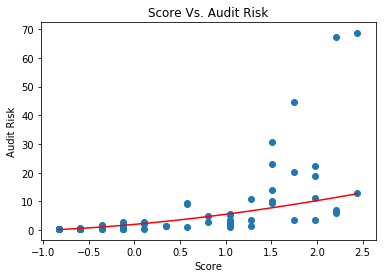

In [117]:
X_b = X_train[:100,10].reshape(-1,1)
y_b = y_train[:100]

svr=SVR(kernel='rbf',C=100,gamma=0.01)
svr.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = svr.predict(X_new)

plt.plot(X_new, y_predict, c = 'r',label='Prediction')
plt.scatter(X_b, y_b,label='Actual Data Points')
plt.xlabel('Score')
plt.ylabel('Audit Risk')
plt.title('Score Vs. Audit Risk')

### ix) Decision Tree


In [118]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
print('Train Score {}'.format(tree.score(X_train,y_train)))
print('Test Score {}'.format(tree.score(X_test,y_test)))

Train Score 0.9999999998153674
Test Score 0.9053696518238945


#### Using Grid Search to find the best parameters

In [119]:
tree=DecisionTreeRegressor()

parameters={'max_depth':[2,5,10,20,50,100], 'min_samples_split':[2,10,20,50,100],'max_leaf_nodes':[30,100,150,200,300,400,500,700,800]}

grid_search = GridSearchCV(tree,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_



In [120]:
print('Best Accuracy is {}'.format(best_accuracy))
print('Best Parameters {}'.format(best_parameters))

Best Accuracy is 0.9073247621697536
Best Parameters {'max_depth': 100, 'max_leaf_nodes': 100, 'min_samples_split': 2}


#### Visualizing the results

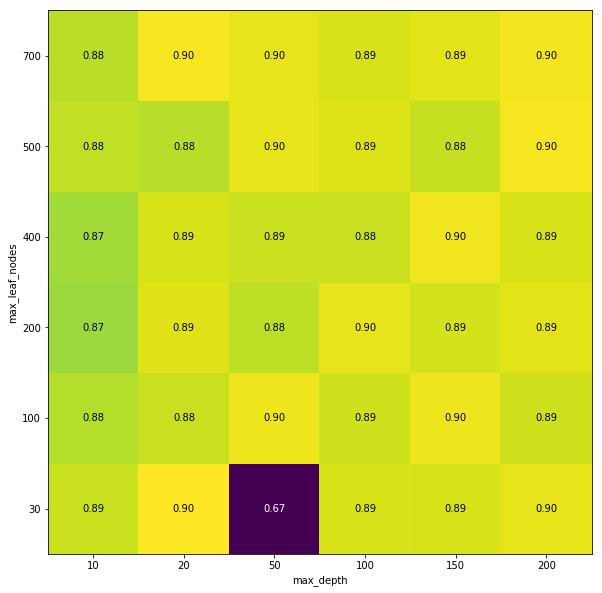

In [121]:
tree=DecisionTreeRegressor(min_samples_split=2)

parameters={'max_depth':[10,20,50,100,150,200],'max_leaf_nodes':[30,100,200,400,500,700]}

grid_search = GridSearchCV(tree,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
plt.figure(figsize=(10,10))
mglearn.tools.heatmap(scores, xlabel='max_depth', xticklabels=parameters['max_depth'], ylabel='max_leaf_nodes', yticklabels=parameters['max_leaf_nodes'], cmap="viridis")


### Fitting tree with best parameters

In [134]:
tree=DecisionTreeRegressor(max_depth=100, max_leaf_nodes=100, min_samples_split=2)
tree.fit(X_train,y_train)
print('Train Score {}'.format(tree.score(X_train,y_train)))
print('Test Score {}'.format(tree.score(X_test,y_test)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,tree.predict(X_test))))

Train Score 0.9999395876019854
Test Score 0.9325329798134289
Mean Squared Error : 7.762353797839408


#### Visualizing Feature Importances

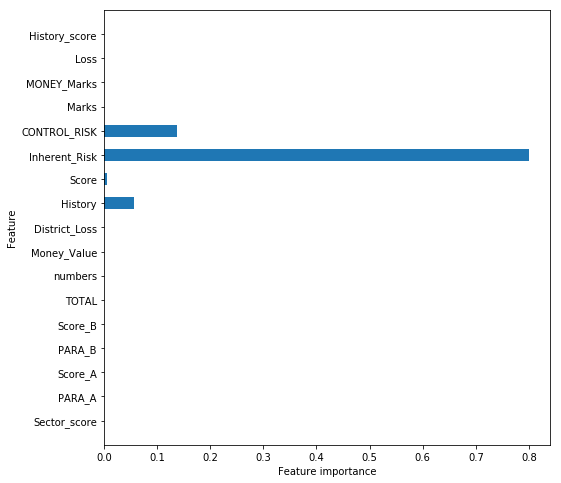

In [135]:
cols=X.columns.values
def plot_feature_importances(model):
    plt.figure(figsize=(8,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, height=0.5,align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

#### Inherent RIsk is the most important feature as per our decision Tree
#### However, if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

### Using Cross Validation

In [136]:
tree=DecisionTreeRegressor(max_depth=100, max_leaf_nodes=100, min_samples_split=2)
score = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)

print('Average Validation Accuracy is {}'.format(score.mean()))
print('Mean Standard Deviation in accuracies is {}\n'.format(score.std()))

Average Validation Accuracy is 0.9116015761396816
Mean Standard Deviation in accuracies is 0.09716924151845098



### Using K-fold Cross Validation

In [137]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
tree=DecisionTreeRegressor(max_depth=100, max_leaf_nodes=100, min_samples_split=2)
score = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = kfold)

print('Average Cross-validation score:{}\n'.format(score.mean()))

Average Cross-validation score:0.8978523814280658



### Let's view the tree

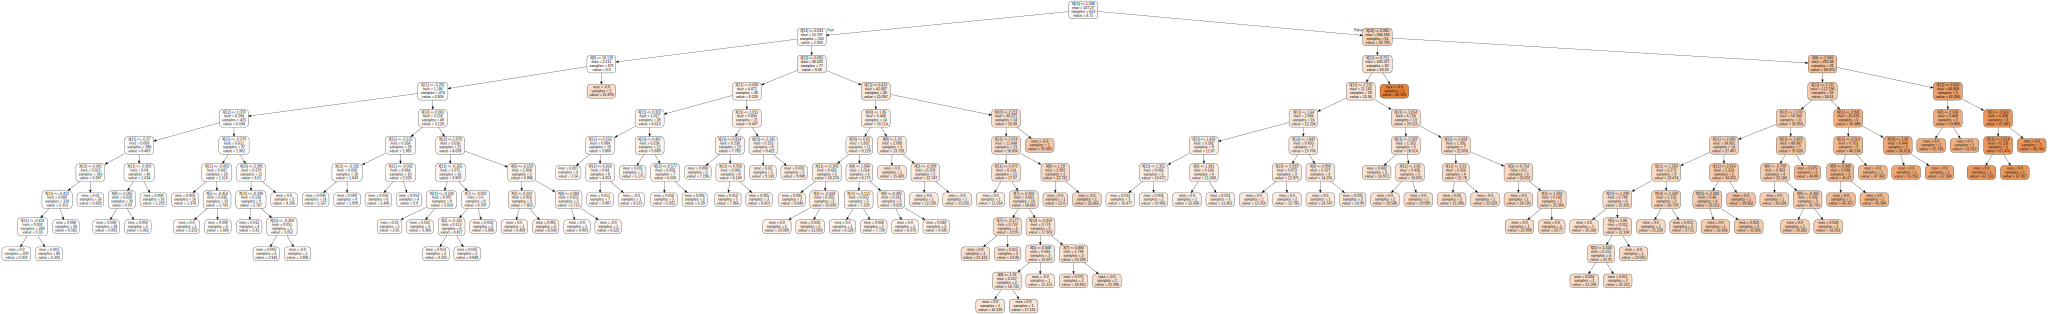

In [138]:
import os 
import graphviz

os.environ["PATH"] += os.pathsep + 'C:/users/nick2/Downloads/graphviz-2.38/release/bin'
#C:\Users\nick2\Downloads\graphviz-2.38\release\bin

tree=DecisionTreeRegressor(max_depth=100, max_leaf_nodes=100, min_samples_split=2)
tree.fit(X_train,y_train)

# Create DOT data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True) 
# Draw graph
graph = graphviz.Source(dot_data) 

# Show graph
graph 

### x) Random Forest

- We have used Standard Scalar because it is better in general, Min Max scalar works well when the data is bounded, for example when we have image data, all the values are between 0 to 255 for pixels

In [128]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))

Train Score 0.9863825313536336
Test Score 0.9292133693258884


### Let's Find Best Parameters using Grid Search and Visualize the results

Best Accuracy is 0.927909872705538
Best Parameters {'max_depth': 50, 'n_estimators': 200}


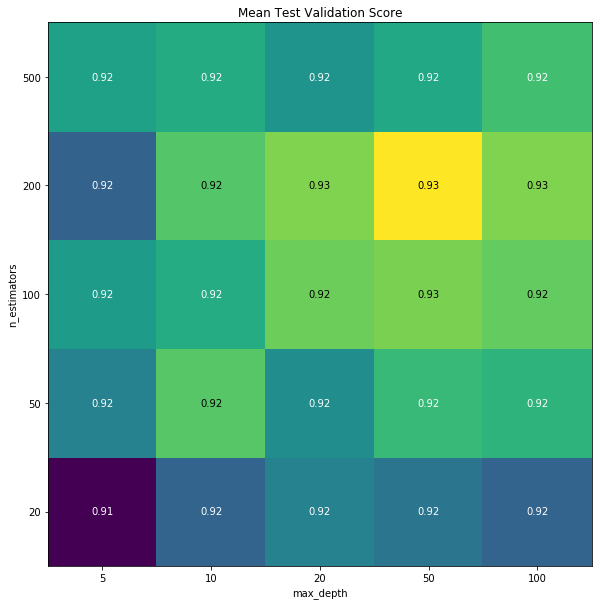

In [129]:
forest= RandomForestRegressor()

parameters={'max_depth':[5,10,20,50,100], 'n_estimators':[20,50,100,200,500]}

grid_search = GridSearchCV(forest,parameters,cv=10,return_train_score=True)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy is {}'.format(best_accuracy))
print('Best Parameters {}'.format(best_parameters))


results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
plt.figure(figsize=(10,10))
plt.title('Mean Test Validation Score')
mglearn.tools.heatmap(scores, xlabel='max_depth', xticklabels=parameters['max_depth'], ylabel='n_estimators', yticklabels=parameters['n_estimators'], cmap="viridis")



#### So we have found best parameters as max_depth=50 and number of tress in our forest =200
#### Let's Build Model with best parameters

In [130]:
forest= RandomForestRegressor(max_depth=50,n_estimators=200)
forest.fit(X_train,y_train)

print('Train Score {}'.format(forest.score(X_train,y_train)))
print('Test Score {}'.format(forest.score(X_test,y_test)))
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,forest.predict(X_test))))

Train Score 0.9894399181548541
Test Score 0.9241067109200476
Mean Squared Error : 8.73183014591698


#### Using Cross Validation

In [131]:
forest= RandomForestRegressor(max_depth=50,n_estimators=200)
score = cross_val_score(estimator = forest, X = X_train, y = y_train, cv = 10)

print('Average Validation Accuracy is {}'.format(score.mean()))
print('Mean Standard Deviation in accuracies is {}\n'.format(score.std()))

Average Validation Accuracy is 0.9236610184162185
Mean Standard Deviation in accuracies is 0.09297389648436646



#### Using Stratified Cross Validation

In [133]:
kfold = KFold(n_splits=10)
forest= RandomForestRegressor(max_depth=50,n_estimators=200)
score = cross_val_score(estimator = forest, X = X_train, y = y_train, cv = kfold)

print('Average Cross-validation score:{}\n'.format(score.mean()))

Average Cross-validation score:0.9241822253239078



#### Let's Have a look at the feature importances

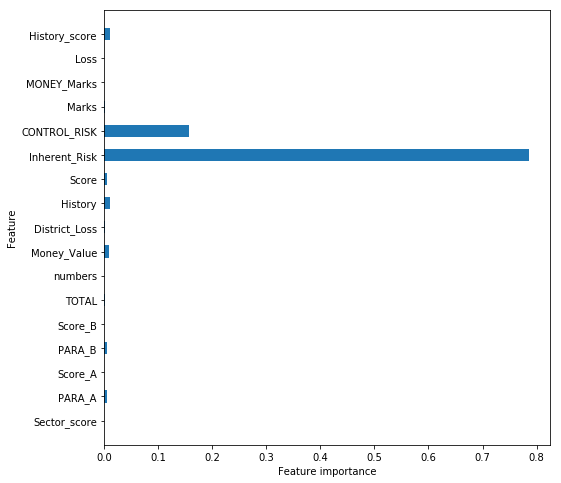

In [132]:
forest= RandomForestRegressor(max_depth=10,n_estimators=20)
forest.fit(X_train,y_train)
cols=X.columns.values
def plot_feature_importances(model):
    plt.figure(figsize=(8,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, height=0.5,align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

#### Inherent RIsk is the most important feature as per the Random Forest which matches the results of decision Tree
#### However, if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------

# Finding Best Regression Model

In [143]:
Final = pd.read_csv(r'C:\Users\nick2\Desktop\Regression_Results.csv')
Final

,Regressor,Train Score,Test Score,Validation Accuracy,Best parameters found
0,KNN,0.8652,0.7851,0.7500,k=4
1,Linear Regression,0.8900,0.8200,0.2500,"copy_X: True fit_intercept=True normalize=False"""
2,Ridge,0.8700,0.8300,0.8200,a=100
3,Lasso,0.8400,0.8000,0.7900,a=1 iter=1000
4,Stochastic Gradient Descent,0.8800,0.8200,0.8082,learning_rate=invscaling penalty = l2
5,Polynomial Regression,1.0000,0.9900,0.9800,No hyperparameter
6,Linear SVM,0.7900,0.7400,0.7100,C=0.1
7,Kernelized SVR,0.9900,0.9600,0.9300,c-100 gamma=0.01 rbf
8,Decision Tree,0.9900,0.9300,0.9100,max_depth=100 max_leaf_nodes=100 min_sample...
9,Random Forest,0.9894,0.9241,0.9236,max_depth=50 n_estimators=200


- Our choice for best regression model would be Kernelized SVR
- Polynomial is overfitting the data, it is performing excellently on test set as well and its validation accuracy is also quite good.
- Polynomial Regression also has the best Mean squared error of all
#### Polynomial Regression 
- Train Score = 1
- Test score = 0.99
- Validation Accuracy = 0.98

- SVR has also performed well, with a gap of 3% between test and train score having the best Mean squared error after polynomial Regression, but the fact that Polynomial Regressor is overfitting the data can't be ignored though it is a simpler model as compared to SVR
#### SVR
- Train Score = 0.99
- Test score = 0.96
- Validation Accuracy = 8.34

##### SVR with rbf kernel is our best model for Regression


-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
